Tech Challenge - Group 61

In [106]:
# PHASE 04

# Matheus Diniz
# Miguel Chiarello
# Taynara Nascimento

SETTINGS

In [107]:
## Data Analysis Library 
# import polars as pl
import pandas as pd
import numpy as np
import ipeadatapy as idpy

## DataViz Library 
import matplotlib.pyplot as plt
import seaborn as sns

## ML Library 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


## Docs
# https://www.pola.rs/
# https://pandas.pydata.org/docs/reference/index.html
# https://numpy.org/numpy-tutorials/
# https://matplotlib.org/stable/plot_types/index.html
# https://scikit-learn.org/stable/modules/classes.html


## Tech Challenge Reference
# https://on.fiap.com.br/mod/conteudoshtml/view.php?id=358318&c=9996&sesskey=LH7fswE55A
# http://www.ipeadata.gov.br/Default.aspx
# https://finalytics.streamlit.app/

EXTRACTING

    API Oil Price

In [108]:
db_oil = idpy.timeseries("EIA366_PBRENT366").reset_index()
db_oil.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
0,1986-01-04,EIA366_PBRENT366,1986-01-04T00:00:00-02:00,4,1,1986,NaN
1,1986-01-05,EIA366_PBRENT366,1986-01-05T00:00:00-02:00,5,1,1986,NaN
2,1986-01-06,EIA366_PBRENT366,1986-01-06T00:00:00-02:00,6,1,1986,NaN
3,1986-01-07,EIA366_PBRENT366,1986-01-07T00:00:00-02:00,7,1,1986,NaN
4,1986-01-08,EIA366_PBRENT366,1986-01-08T00:00:00-02:00,8,1,1986,NaN


In [109]:
db_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13362 entries, 0 to 13361
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         13362 non-null  datetime64[ns]
 1   CODE         13362 non-null  object        
 2   RAW DATE     13362 non-null  object        
 3   DAY          13362 non-null  int64         
 4   MONTH        13362 non-null  int64         
 5   YEAR         13362 non-null  int64         
 6   VALUE (US$)  11092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 730.9+ KB


In [110]:
db_oil.describe()

,DAY,MONTH,YEAR,VALUE (US$)
count,13362.000000,13362.000000,13362.000000,11092.000000
mean,15.723769,6.509130,2003.873148,52.796398
std,8.789573,3.451996,10.670024,33.230129
min,1.000000,1.000000,1986.000000,9.100000
25%,8.000000,4.000000,1995.000000,20.407500
50%,16.000000,7.000000,2004.000000,47.900000
75%,23.000000,10.000000,2013.000000,75.750000
max,31.000000,12.000000,2024.000000,143.950000


    API Euro Value

In [111]:
db_euro = idpy.timeseries("GM366_EREURO366").reset_index()
db_euro.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (Euro)
0,1999-01-04,GM366_EREURO366,1999-01-04T00:00:00-02:00,4,1,1999,0.841157
1,1999-01-05,GM366_EREURO366,1999-01-05T00:00:00-02:00,5,1,1999,0.847678
2,1999-01-06,GM366_EREURO366,1999-01-06T00:00:00-02:00,6,1,1999,0.859567
3,1999-01-07,GM366_EREURO366,1999-01-07T00:00:00-02:00,7,1,1999,0.852447
4,1999-01-08,GM366_EREURO366,1999-01-08T00:00:00-02:00,8,1,1999,0.861268


In [112]:
db_euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          8230 non-null   datetime64[ns]
 1   CODE          8230 non-null   object        
 2   RAW DATE      8230 non-null   object        
 3   DAY           8230 non-null   int64         
 4   MONTH         8230 non-null   int64         
 5   YEAR          8230 non-null   int64         
 6   VALUE (Euro)  6284 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 450.2+ KB


In [113]:
db_euro.describe()

,DAY,MONTH,YEAR,VALUE (Euro)
count,8230.000000,8230.000000,8230.000000,6284.000000
mean,15.765614,6.510207,2010.081045,0.856403
std,8.787474,3.452306,6.961755,0.117513
min,1.000000,1.000000,1999.000000,0.625078
25%,8.000000,4.000000,2004.000000,0.765090
50%,16.000000,7.000000,2010.000000,0.846737
75%,23.000000,10.000000,2015.000000,0.919477
max,31.000000,12.000000,2024.000000,1.204801


    API Dolar Value

In [114]:
db_dolar = idpy.timeseries("BM12_ERC12").reset_index()
db_dolar.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (R$)
0,1953-01-01,BM12_ERC12,1953-01-01T00:00:00-02:00,1,1,1953,6.683636e-15
1,1953-02-01,BM12_ERC12,1953-02-01T00:00:00-02:00,1,2,1953,1.337829e-14
2,1953-03-01,BM12_ERC12,1953-03-01T00:00:00-03:00,1,3,1953,1.337829e-14
3,1953-04-01,BM12_ERC12,1953-04-01T00:00:00-03:00,1,4,1953,1.488364e-14
4,1953-05-01,BM12_ERC12,1953-05-01T00:00:00-03:00,1,5,1953,1.427567e-14


In [115]:
db_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        852 non-null    datetime64[ns]
 1   CODE        852 non-null    object        
 2   RAW DATE    852 non-null    object        
 3   DAY         852 non-null    int64         
 4   MONTH       852 non-null    int64         
 5   YEAR        852 non-null    int64         
 6   VALUE (R$)  852 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 46.7+ KB


In [116]:
db_dolar.describe()

,DAY,MONTH,YEAR,VALUE (R$)
count,852.0,852.00000,852.000000,8.520000e+02
mean,1.0,6.50000,1988.000000,1.103494e+00
std,0.0,3.45408,20.505939,1.547338e+00
min,1.0,1.00000,1953.000000,6.683636e-15
25%,1.0,3.75000,1970.000000,1.701818e-12
50%,1.0,6.50000,1988.000000,7.130364e-08
75%,1.0,9.25000,2006.000000,2.030658e+00
max,1.0,12.00000,2023.000000,5.650604e+00


    API IPC

In [117]:
db_ipc = idpy.timeseries("IGP366_IPCS366").reset_index()
db_ipc.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.m.))
0,2003-01-29,IGP366_IPCS366,2003-01-29T00:00:00-02:00,29,1,2003,2.18
1,2003-01-30,IGP366_IPCS366,2003-01-30T00:00:00-02:00,30,1,2003,NaN
2,2003-01-31,IGP366_IPCS366,2003-01-31T00:00:00-02:00,31,1,2003,NaN
3,2003-02-01,IGP366_IPCS366,2003-02-01T00:00:00-02:00,1,2,2003,NaN
4,2003-02-02,IGP366_IPCS366,2003-02-02T00:00:00-02:00,2,2,2003,NaN


In [118]:
db_ipc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5156 entries, 0 to 5155
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              5156 non-null   datetime64[ns]
 1   CODE              5156 non-null   object        
 2   RAW DATE          5156 non-null   object        
 3   DAY               5156 non-null   int64         
 4   MONTH             5156 non-null   int64         
 5   YEAR              5156 non-null   int64         
 6   VALUE ((% a.m.))  1012 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 282.1+ KB


In [119]:
db_ipc.describe()

,DAY,MONTH,YEAR,VALUE ((% a.m.))
count,5156.000000,5156.000000,5156.000000,1012.000000
mean,15.944725,6.502327,2009.884794,0.486542
std,8.825864,3.455157,4.584365,0.383807
min,1.000000,1.000000,2003.000000,-1.280000
25%,8.000000,3.000000,2006.000000,0.260000
50%,16.000000,7.000000,2010.000000,0.470000
75%,23.000000,10.000000,2013.000000,0.710000
max,31.000000,12.000000,2023.000000,2.180000


    API Nasdaq

In [120]:
db_nasdaq = idpy.timeseries("SGS366_NASDAQ366").reset_index()
db_nasdaq.head()

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (-)
0,1971-02-05,SGS366_NASDAQ366,1971-02-05T00:00:00-02:00,5,2,1971,100.00
1,1971-02-06,SGS366_NASDAQ366,1971-02-06T00:00:00-02:00,6,2,1971,NaN
2,1971-02-07,SGS366_NASDAQ366,1971-02-07T00:00:00-02:00,7,2,1971,NaN
3,1971-02-08,SGS366_NASDAQ366,1971-02-08T00:00:00-02:00,8,2,1971,100.84
4,1971-02-09,SGS366_NASDAQ366,1971-02-09T00:00:00-02:00,9,2,1971,100.76


In [121]:
db_nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18413 entries, 0 to 18412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       18413 non-null  datetime64[ns]
 1   CODE       18413 non-null  object        
 2   RAW DATE   18413 non-null  object        
 3   DAY        18413 non-null  int64         
 4   MONTH      18413 non-null  int64         
 5   YEAR       18413 non-null  int64         
 6   VALUE (-)  13320 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 1007.1+ KB


In [122]:
db_nasdaq.describe()

,DAY,MONTH,YEAR,VALUE (-)
count,18413.000000,18413.000000,18413.000000,13320.000000
mean,15.730516,6.526422,1995.941020,2534.415154
std,8.794096,3.444309,14.782815,3454.815384
min,1.000000,1.000000,1971.000000,54.870000
25%,8.000000,4.000000,1983.000000,272.962500
50%,16.000000,7.000000,1996.000000,1315.140000
75%,23.000000,10.000000,2008.000000,2804.230000
max,31.000000,12.000000,2024.000000,16057.440000


TRANSFORMING

    DataBase Oil Price

In [123]:
## ADJUSTING DATA BASE DIMENSIONS AND DATA TYPE

db_oil = db_oil.rename(columns={'RAW DATE': 'key_date', 'DATE': 'date', 'DAY': 'day', 'MONTH': 'month', 'YEAR': 'year', 'VALUE (US$)': 'oil_value_usd'})
db_oil = db_oil.dropna(subset="oil_value_usd")
db_oil['key_date'] = db_oil['key_date'].str[:10]

db_oil['date'] = pd.to_datetime(db_oil['date'], format='%d.%m.%Y')
db_oil['week_date'] = db_oil['date'].dt.day_name()
# db_oil['year'] = db_oil['year'].astype('int64')
# db_oil['dolar_value_brl'] = db_oil['oil_value_usd'].astype(float)

db_oil = db_oil[['key_date', 'date', 'year', 'month', 'day', 'week_date', 'oil_value_usd']]

db_oil.head()


,key_date,date,year,month,day,week_date,oil_value_usd
499,1987-05-20,1987-05-20,1987,5,20,Wednesday,18.63
500,1987-05-21,1987-05-21,1987,5,21,Thursday,18.45
501,1987-05-22,1987-05-22,1987,5,22,Friday,18.55
504,1987-05-25,1987-05-25,1987,5,25,Monday,18.60
505,1987-05-26,1987-05-26,1987,5,26,Tuesday,18.63


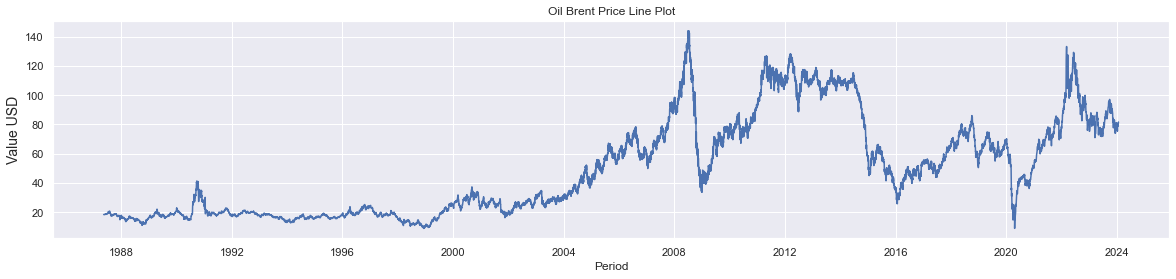

In [124]:
## SETTING TIME SERIES LINE PLOT 

sns.set_style('darkgrid')
plt.figure(figsize=(20, 4))

plt.title('Oil Brent Price Line Plot', fontsize=12)
plt.ylabel('Value USD', fontsize=14)
plt.xlabel('Period')

sns.lineplot(x=db_oil['date'], y=db_oil['oil_value_usd'])

plt.show()

    DataBase Euro Value

In [125]:
## ADJUSTING DATA BASE DIMENSIONS AND DATA TYPE

db_euro = db_euro.rename(columns={'RAW DATE': 'key_date', 'DATE': 'date', 'DAY': 'day', 'MONTH': 'month', 'YEAR': 'year', 'VALUE (Euro)': 'euro_value_usd'})
db_euro = db_euro.dropna(subset="euro_value_usd")
db_euro['key_date'] = db_euro['key_date'].str[:10]

db_euro['date'] = pd.to_datetime(db_euro['date'], format='%d.%m.%Y')
db_euro['week_date'] = db_euro['date'].dt.day_name()
# db_euro['year'] = db_euro['year'].astype('int64')
# db_euro['dolar_value_brl'] = db_euro['oil_value_usd'].astype(float)

db_euro = db_euro[['key_date', 'date', 'year', 'month', 'day', 'week_date', 'euro_value_usd']]

db_euro.head()

,key_date,date,year,month,day,week_date,euro_value_usd
0,1999-01-04,1999-01-04,1999,1,4,Monday,0.841157
1,1999-01-05,1999-01-05,1999,1,5,Tuesday,0.847678
2,1999-01-06,1999-01-06,1999,1,6,Wednesday,0.859567
3,1999-01-07,1999-01-07,1999,1,7,Thursday,0.852447
4,1999-01-08,1999-01-08,1999,1,8,Friday,0.861268


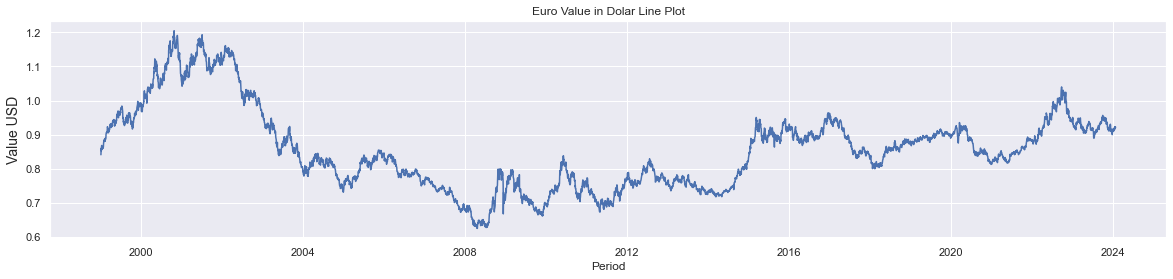

In [126]:
## SETTING TIME SERIES LINE PLOT 

sns.set_style('darkgrid')
plt.figure(figsize=(20, 4))

plt.title('Euro Value in Dolar Line Plot', fontsize=12)
plt.ylabel('Value USD', fontsize=14)
plt.xlabel('Period')

sns.lineplot(x=db_euro['date'], y=db_euro['euro_value_usd'])

plt.show()

    DataBase Dolar Value

In [127]:
## ADJUSTING DATA BASE DIMENSIONS AND DATA TYPE

db_dolar = db_dolar.rename(columns={'RAW DATE': 'key_date', 'DATE': 'date', 'DAY': 'day', 'MONTH': 'month', 'YEAR': 'year', 'VALUE (R$)': 'dolar_value_brl'})
db_dolar = db_dolar.dropna(subset="dolar_value_brl")
db_dolar['key_date'] = db_dolar['key_date'].str[:10]

db_dolar['date'] = pd.to_datetime(db_dolar['date'], format='%d.%m.%Y')
db_dolar['week_date'] = db_dolar['date'].dt.day_name()
# db_dolar['year'] = db_dolar['year'].astype('int64')
# db_dolar['dolar_value_brl'] = db_dolar['oil_value_usd'].astype(float)

db_dolar = db_dolar[['key_date', 'date', 'year', 'month', 'day', 'week_date', 'dolar_value_brl']]

db_dolar.head()

,key_date,date,year,month,day,week_date,dolar_value_brl
0,1953-01-01,1953-01-01,1953,1,1,Thursday,6.683636e-15
1,1953-02-01,1953-02-01,1953,2,1,Sunday,1.337829e-14
2,1953-03-01,1953-03-01,1953,3,1,Sunday,1.337829e-14
3,1953-04-01,1953-04-01,1953,4,1,Wednesday,1.488364e-14
4,1953-05-01,1953-05-01,1953,5,1,Friday,1.427567e-14


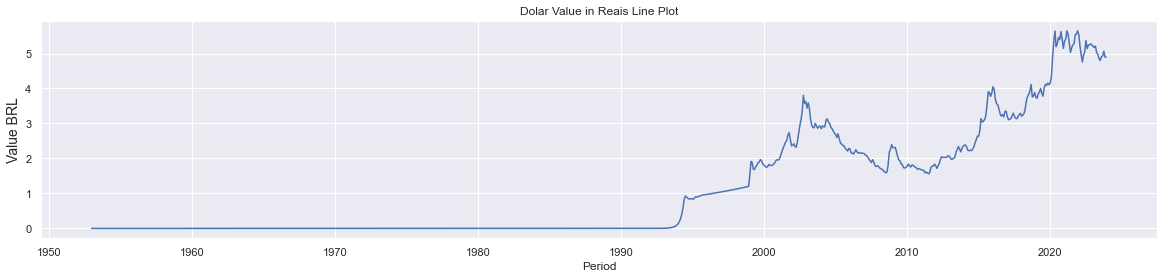

In [128]:
## SETTING TIME SERIES LINE PLOT 

sns.set_style('darkgrid')
plt.figure(figsize=(20, 4))

plt.title('Dolar Value in Reais Line Plot', fontsize=12)
plt.ylabel('Value BRL', fontsize=14)
plt.xlabel('Period')

sns.lineplot(x=db_dolar['date'], y=db_dolar['dolar_value_brl'])

plt.show()

    DataBase IPC

In [129]:
## ADJUSTING DATA BASE DIMENSIONS AND DATA TYPE

db_ipc = db_ipc.rename(columns={'RAW DATE': 'key_date', 'DATE': 'date', 'DAY': 'day', 'MONTH': 'month', 'YEAR': 'year', 'VALUE ((% a.m.))': 'ipc_value_percent_a_m'})
db_ipc = db_ipc.dropna(subset="ipc_value_percent_a_m")
db_ipc['key_date'] = db_ipc['key_date'].str[:10]

db_ipc['date'] = pd.to_datetime(db_ipc['date'], format='%d.%m.%Y')
db_ipc['week_date'] = db_ipc['date'].dt.day_name()
# db_ipc['year'] = db_ipc['year'].astype('int64')
# db_ipc['dolar_value_brl'] = db_ipc['oil_value_usd'].astype(float)

db_ipc = db_ipc[['key_date', 'date', 'year', 'month', 'day', 'week_date', 'ipc_value_percent_a_m']]

db_ipc.head()

,key_date,date,year,month,day,week_date,ipc_value_percent_a_m
0,2003-01-29,2003-01-29,2003,1,29,Wednesday,2.18
8,2003-02-06,2003-02-06,2003,2,6,Thursday,2.16
14,2003-02-12,2003-02-12,2003,2,12,Wednesday,1.83
20,2003-02-18,2003-02-18,2003,2,18,Tuesday,1.55
29,2003-02-27,2003-02-27,2003,2,27,Thursday,1.22


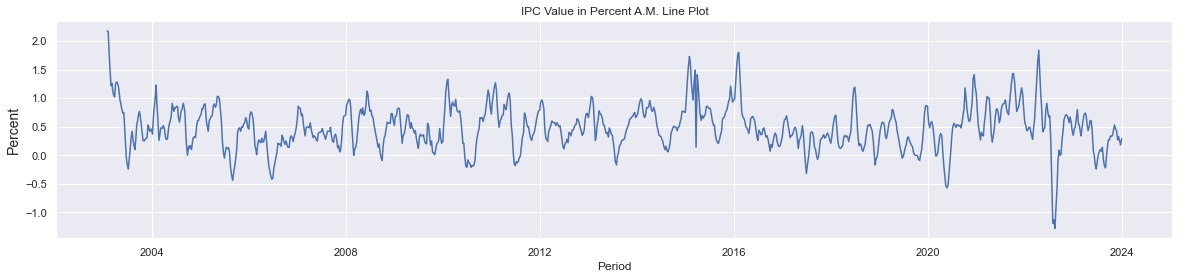

In [130]:
## SETTING TIME SERIES LINE PLOT 

sns.set_style('darkgrid')
plt.figure(figsize=(20, 4))

plt.title('IPC Value in Percent A.M. Line Plot', fontsize=12)
plt.ylabel('Percent', fontsize=14)
plt.xlabel('Period')

sns.lineplot(x=db_ipc['date'], y=db_ipc['ipc_value_percent_a_m'])

plt.show()

    DataBase Nasdaq

In [131]:
## ADJUSTING DATA BASE DIMENSIONS AND DATA TYPE

db_nasdaq = db_nasdaq.rename(columns={'RAW DATE': 'key_date', 'DATE': 'date', 'DAY': 'day', 'MONTH': 'month', 'YEAR': 'year', 'VALUE (-)': 'nasdaq_value'})
db_nasdaq = db_nasdaq.dropna(subset="nasdaq_value")
db_nasdaq['key_date'] = db_nasdaq['key_date'].str[:10]

db_nasdaq['date'] = pd.to_datetime(db_nasdaq['date'], format='%d.%m.%Y')
db_nasdaq['week_date'] = db_nasdaq['date'].dt.day_name()
# db_nasdaq['year'] = db_nasdaq['year'].astype('int64')
# db_nasdaq['dolar_value_brl'] = db_nasdaq['oil_value_usd'].astype(float)

db_nasdaq = db_nasdaq[['key_date', 'date', 'year', 'month', 'day', 'week_date', 'nasdaq_value']]

db_nasdaq.head()

,key_date,date,year,month,day,week_date,nasdaq_value
0,1971-02-05,1971-02-05,1971,2,5,Friday,100.00
3,1971-02-08,1971-02-08,1971,2,8,Monday,100.84
4,1971-02-09,1971-02-09,1971,2,9,Tuesday,100.76
5,1971-02-10,1971-02-10,1971,2,10,Wednesday,100.69
6,1971-02-11,1971-02-11,1971,2,11,Thursday,101.45


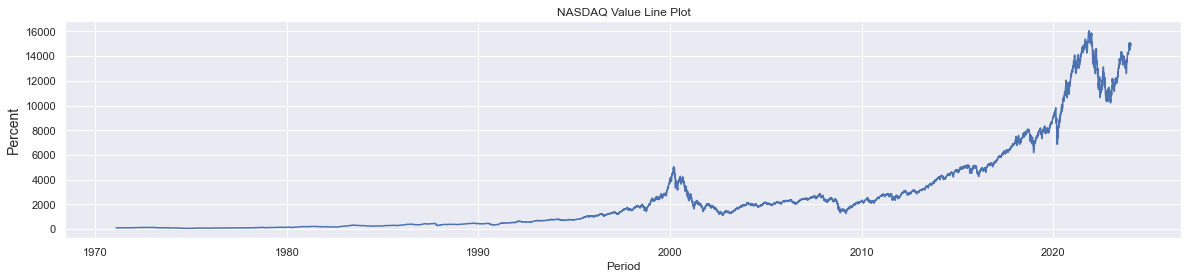

In [132]:
## SETTING TIME SERIES LINE PLOT 

sns.set_style('darkgrid')
plt.figure(figsize=(20, 4))

plt.title('NASDAQ Value Line Plot', fontsize=12)
plt.ylabel('Percent', fontsize=14)
plt.xlabel('Period')

sns.lineplot(x=db_nasdaq['date'], y=db_nasdaq['nasdaq_value'])

plt.show()

    Main DataBase

In [133]:
## MERGING DATABASES INTO ONE

## db_oil + db_euro
db_core_1 = db_oil.loc[db_oil['date'] >= '2000-01-01']
db_merge_1 = db_euro.loc[db_euro['date'] >= '2000-01-01']
db_stage_1 = db_core_1.merge(db_merge_1, how='left', on='key_date')
db_stage_1 = db_stage_1.drop(columns=['date_y', 'year_y', 'month_y', 'day_y', 'week_date_y'])
db_stage_1 = db_stage_1.rename(columns={'date_x': 'date', 'year_x': 'year', 'month_x': 'month', 'day_x': 'day', 'week_date_x': 'week_date'})

## db_oil + db_euro + db_dolar
db_merge_2 = db_dolar.loc[db_dolar['date'] >= '2000-01-01']
db_stage_2 = db_stage_1.merge(db_merge_2, how='left', on='key_date')
db_stage_2 = db_stage_2.drop(columns=['date_y', 'year_y', 'month_y', 'day_y', 'week_date_y'])
db_stage_2 = db_stage_2.rename(columns={'date_x': 'date', 'year_x': 'year', 'month_x': 'month', 'day_x': 'day', 'week_date_x': 'week_date'})

## db_oil + db_euro + db_dolar + db_ipc
db_merge_3 = db_ipc.loc[db_ipc['date'] >= '2000-01-01']
db_stage_3 = db_stage_2.merge(db_merge_3, how='left', on='key_date')
db_stage_3 = db_stage_3.drop(columns=['date_y', 'year_y', 'month_y', 'day_y', 'week_date_y'])
db_stage_3 = db_stage_3.rename(columns={'date_x': 'date', 'year_x': 'year', 'month_x': 'month', 'day_x': 'day', 'week_date_x': 'week_date'})

## db_oil + db_euro + db_dolar + db_ipc + db_nasdaq
db_merge_4 = db_nasdaq.loc[db_nasdaq['date'] >= '2000-01-01']
db_stage_4 = db_stage_3.merge(db_merge_4, how='left', on='key_date')
db_stage_4 = db_stage_4.drop(columns=['date_y', 'year_y', 'month_y', 'day_y', 'week_date_y'])
db_main = db_stage_4.rename(columns={'date_x': 'date', 'year_x': 'year', 'month_x': 'month', 'day_x': 'day', 'week_date_x': 'week_date'})


db_main.head()

,key_date,date,year,month,day,week_date,oil_value_usd,euro_value_usd,dolar_value_brl,ipc_value_percent_a_m,nasdaq_value
0,2000-01-04,2000-01-04,2000,1,4,Tuesday,23.95,0.969442,NaN,NaN,3901.69
1,2000-01-05,2000-01-05,2000,1,5,Wednesday,23.72,0.967941,NaN,NaN,3877.54
2,2000-01-06,2000-01-06,2000,1,6,Thursday,23.55,0.967755,NaN,NaN,3727.13
3,2000-01-07,2000-01-07,2000,1,7,Friday,23.35,0.971149,NaN,NaN,3882.62
4,2000-01-10,2000-01-10,2000,1,10,Monday,22.77,0.973321,NaN,NaN,4049.67


In [134]:
db_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7892 entries, 0 to 7891
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   key_date               7892 non-null   object        
 1   date                   7892 non-null   datetime64[ns]
 2   year                   7892 non-null   int64         
 3   month                  7892 non-null   int64         
 4   day                    7892 non-null   int64         
 5   week_date              7892 non-null   object        
 6   oil_value_usd          7892 non-null   float64       
 7   euro_value_usd         5980 non-null   float64       
 8   dolar_value_brl        250 non-null    float64       
 9   ipc_value_percent_a_m  928 non-null    float64       
 10  nasdaq_value           5980 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 739.9+ KB


LOAD

[]

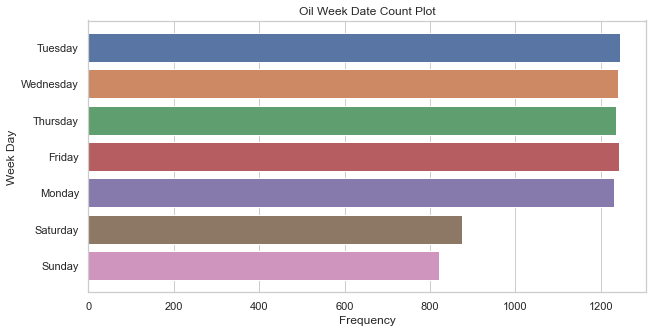

In [144]:
## DATAVIZ COUNT PLOT

fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=db_main, y="week_date")

plt.title('Oil Week Date Count Plot')
plt.xlabel('Frequency')
plt.ylabel('Week Day')

# plt.savefig(r'..\plots\countplot_dia_semana.png', bbox_inches='tight')

plt.plot()

[]

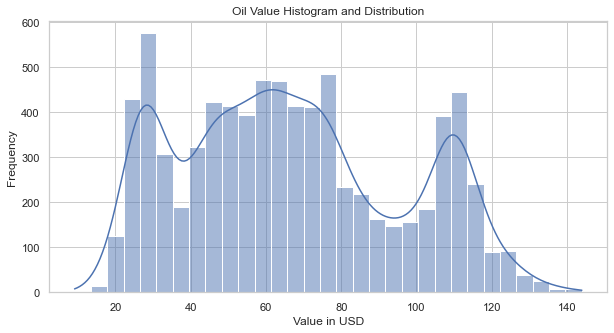

In [145]:
## DATAVIZ HISTOGRAM AND DISTRIBUTION

fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(data=db_main, x="oil_value_usd", kde=True)

plt.title('Oil Value Histogram and Distribution')
plt.xlabel('Value in USD')
plt.ylabel('Frequency')

# plt.savefig(r'..\plots\histogram_distribution_fechamento.png', bbox_inches='tight')

plt.plot()

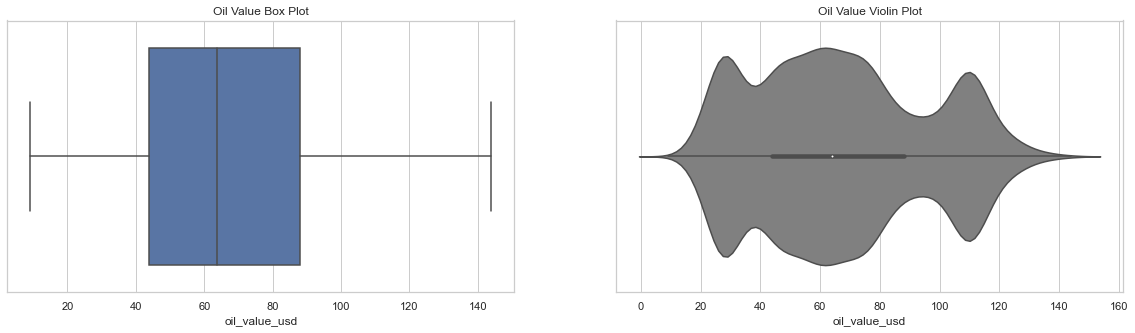

In [146]:
## DATAVIZ BOX PLOT AND VIOLIN PLOT

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

#Box Plot
sns.set(style="whitegrid")
sns.boxplot(x="oil_value_usd", data=db_main, ax=axes[0])
axes[0].set_title('Oil Value Box Plot')
# axes[0].xlabel('Value in USD')


#Violin Plot 
sns.violinplot(x="oil_value_usd", data=db_main, color="gray", ax=axes[1])
axes[1].set_title('Oil Value Violin Plot')
# axes[1].xlabel('Value in USD')

# plt.savefig(r'..\plots\boxplot_violinplot_fechamento.png', bbox_inches='tight')

plt.show()

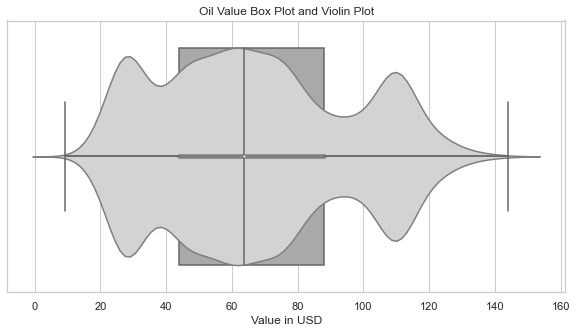

In [147]:
## DATAVIZ BOX PLOT + VIOLIN PLOT

fig, ax = plt.subplots(figsize=(10,5))

sns.violinplot(x='oil_value_usd', data=db_main, ax=ax, color='lightgray')
sns.boxplot(x='oil_value_usd', data=db_main, ax=ax, whis=1.5, color='darkgrey')
ax.set_title('Oil Value Box Plot and Violin Plot')
plt.xlabel('Value in USD')

# plt.savefig(r'..\plots\boxplot_violinplot_union_fechamento.png', bbox_inches='tight')

plt.show()

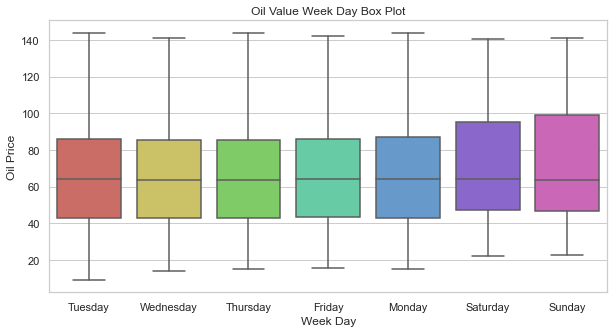

In [149]:
## DATAVIZ BOX PLOT

fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(x='week_date', y='oil_value_usd', data=db_main, palette='hls')
ax.set_title('Oil Value Week Day Box Plot')
plt.xlabel('Week Day')
plt.ylabel('Oil Price')

# plt.savefig(r'..\plots\boxplot_dia_semana_fechamento.png', bbox_inches='tight')

plt.show()

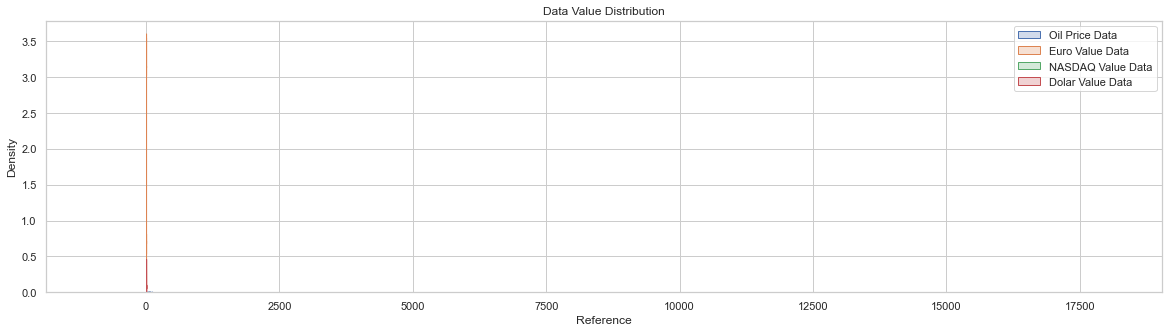

In [150]:
## DATAVIZ DISTRIBUTION PLOT

# Database References
# db_oil_viz = db_oil.loc[db_oil['date'] >= '2000-01-01']
db_oil_viz = db_main['oil_value_usd']

# db_euro_viz = db_euro.loc[db_euro['date'] >= '2000-01-01']
db_euro_viz = db_main['euro_value_usd']

# db_nasdaq_viz = db_nasdaq.loc[db_nasdaq['date'] >= '2000-01-01']
db_nasdaq_viz = db_main['nasdaq_value']

# db_dolar_viz = db_dolar.loc[db_dolar['date'] >= '2000-01-01']
db_dolar_viz = db_main['dolar_value_brl']


# Distribution Plot

plt.figure(figsize=(20, 5))

sns.kdeplot(data=db_oil_viz, label='Oil Price Data', fill=True)
sns.kdeplot(data=db_euro_viz, label='Euro Value Data', fill=True)
sns.kdeplot(data=db_nasdaq_viz, label='NASDAQ Value Data', fill=True)
sns.kdeplot(data=db_dolar_viz, label='Dolar Value Data', fill=True)

plt.title('Data Value Distribution')
plt.xlabel('Reference')
plt.ylabel('Density')
plt.legend()

# plt.savefig(r'..\plots\distribuicao_abertura_fechamento_min_max.png', bbox_inches='tight')

plt.show()

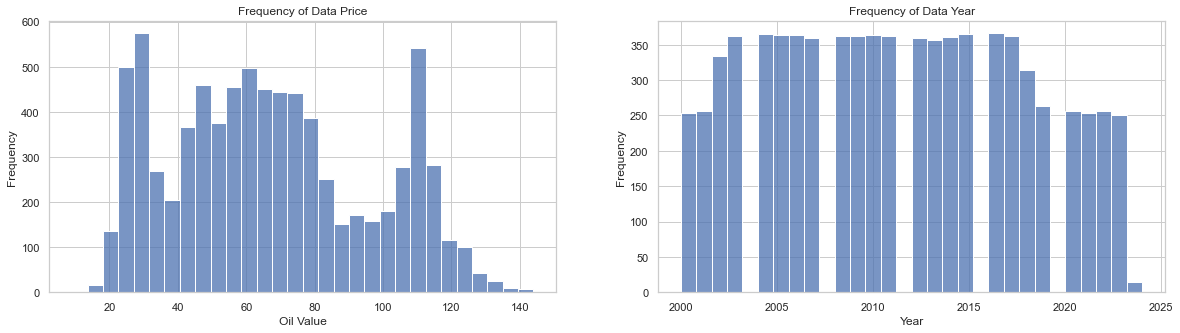

In [151]:
## DATAVIZ FREQUENCY PLOT

# Database References
db_vol = db_main['oil_value_usd'] 
db_var = db_main['year'] 

# Histogram Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Volume Plot
sns.histplot(data=db_vol, bins=30, ax=axes[0])
axes[0].set_title('Frequency of Data Price')
axes[0].set_xlabel('Oil Value')
axes[0].set_ylabel('Frequency')

# Variacao Plot
sns.histplot(data=db_var, bins=30, ax=axes[1])
axes[1].set_title('Frequency of Data Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Frequency')


# fig.tight_layout()
# plt.savefig(r'..\plots\histograma_volume_variacao.png', bbox_inches='tight')

plt.show()

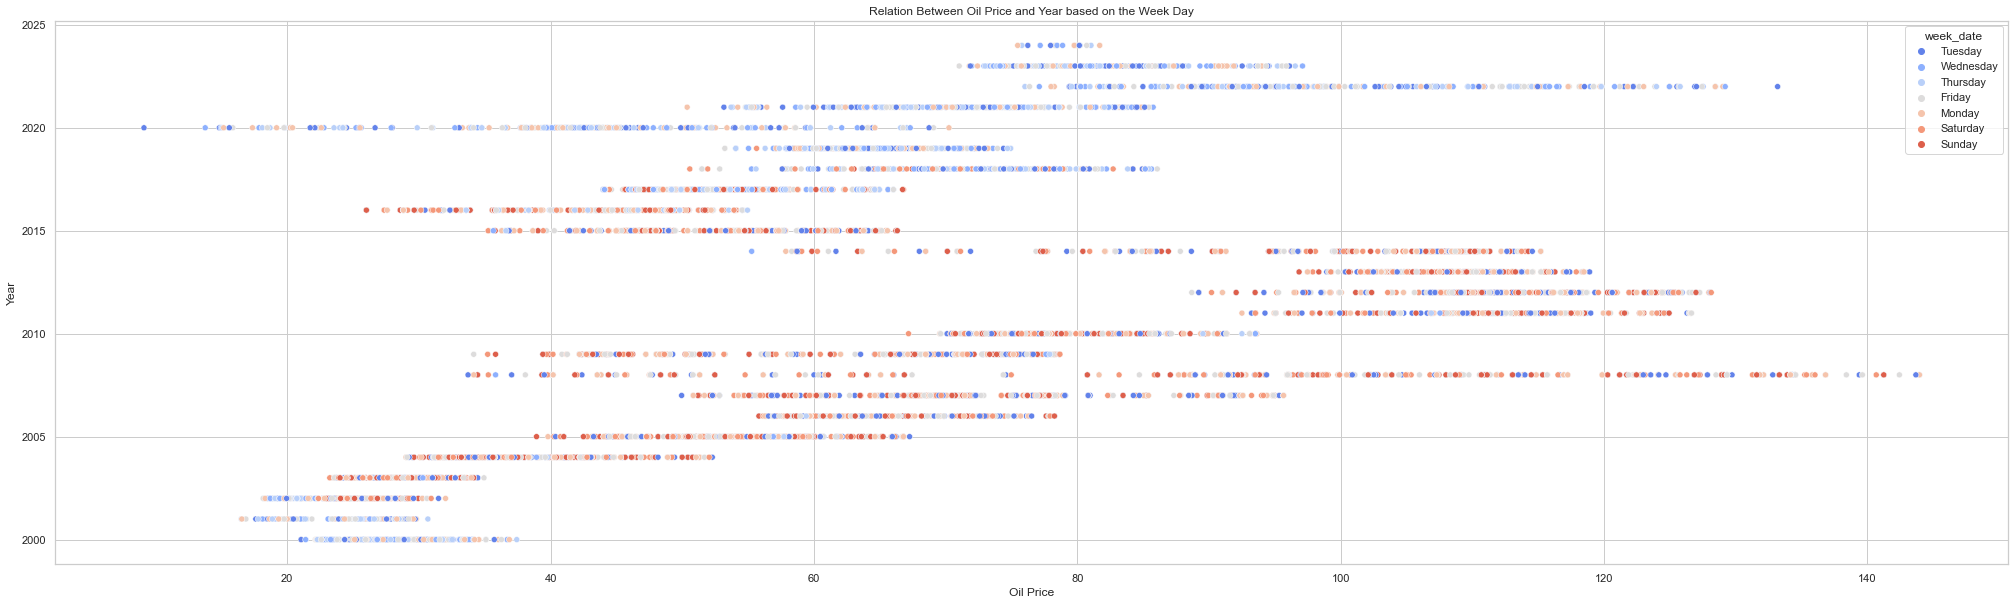

In [152]:
## DATAVIZ SCATTER PLOT

plt.figure(figsize=(35, 10))

sns.scatterplot(x='oil_value_usd', y='year', hue='week_date', data=db_main, palette='coolwarm')

plt.xlabel('Oil Price')
plt.ylabel('Year')
plt.title('Relation Between Oil Price and Year based on the Week Day')

# plt.savefig(r'..\plots\dispersao_volume_fechamento_dia_semana.png', bbox_inches='tight')

plt.show()

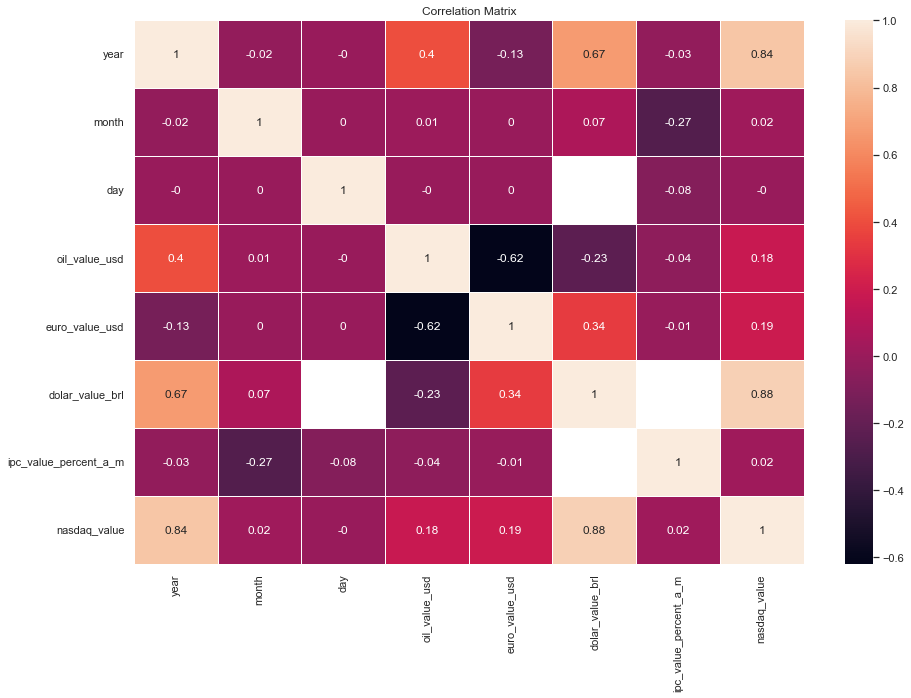

In [154]:
## DATAVIZ HEAT MAP PLOT

# Database References
correlation_matrix = db_main.corr().round(2)


# Matriz de Correlação
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.title('Correlation Matrix')

# plt.savefig(r'..\plots\matriz_correlacao.png', bbox_inches='tight')

plt.show()